# Simple Linear Regression

### Case study: Given a dataset with years of experience and salary details, predict the salary that can be offered for a candidate with 7 years of experience.

### Step 1: Import libraries and dataset

In [1]:
## Import all the necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [2]:
## Import the dataset, change the path as necessary
data = pd.read_csv('salary_data.csv')

In [3]:
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


In [5]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
X = data.iloc[:, :-1].values # copy all columns excluding last column
Y = data.iloc[:, 1].values   # copy the last column only

In [7]:
# View the size of the arrays X and Y
print(X.shape)
print(Y.shape)

(30, 1)
(30,)


In [8]:
# Adding up the missing values (column-wise)
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

### Step 2: Prepare and visualize the given data set

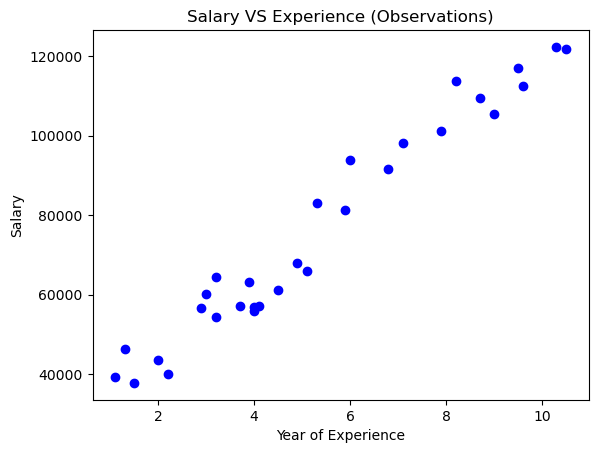

In [9]:
# Visualize the dataset
plt.scatter(X, Y, color='blue')
plt.title('Salary VS Experience (Observations)')
plt.xlabel('Year of Experience')
plt.ylabel('Salary')
plt.show()

In [10]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3, random_state=0)

# There are 30 observations or rows in the dataset. 
# This dataset is split into two - training data and testing data.
# The ratio of split is given by the parameter test_size. 
# In this example test_size=1/3 says that 20 observations are used for training
# and rest 10 observations are used for testing.

# randam_state is the seed for the random number generator. 


### Step 3: Create and train the machine learning model

In [11]:
# Fit Simple Linear Regression to the Training dataset
from sklearn.linear_model import LinearRegression

# Create the model
model = LinearRegression()

# Train the model, using training data set
model.fit(X_train, Y_train)


LinearRegression()

### Step 4:  Model coefficients

In [12]:
# The coefficients

# print the parameter theta1
print('Coefficient = Theta1 = ', model.coef_)
# print the parameter theta0
print('Intercept = Theta0 = ', model.intercept_)

Coefficient = Theta1 =  [9345.94244312]
Intercept = Theta0 =  26816.192244031183


### Step 5:  Visualise fitted regression line

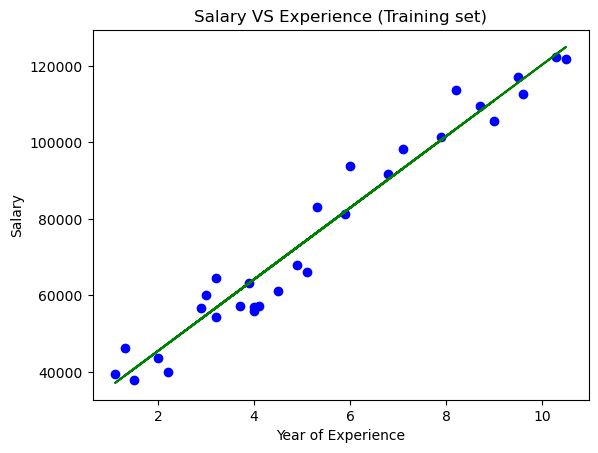

In [13]:
# Visualize the fitted regression line

plt.scatter(X, Y, color='blue')
plt.plot(X_train, model.predict(X_train), color='green')
plt.title('Salary VS Experience (Training set)')
plt.xlabel('Year of Experience')
plt.ylabel('Salary')
plt.show()

### Step 6: Prediction

In [14]:
# Predict salary that can be offered for 7 years of experience
x = np.atleast_1d(7).reshape(-1,1) # convert scalar to array

# Predict the value 
y_pred = model.predict(x)

print('For x= 7 yrs of experience, predicted salary = ', y_pred)

For x= 7 yrs of experience, predicted salary =  [92237.78934589]


In [15]:
# Use trained model to predict on test dataset
Y_predict = model.predict(X_test)

### Step 7: Model evaluation

In [16]:
from sklearn.metrics import mean_squared_error, r2_score

# The mean squared error
#Mean squared error regression loss

print("Mean squared error = %.2f" % mean_squared_error(Y_test, Y_predict))

# Explained variance score: 1 is perfect prediction.
# R^2 (coefficient of determination) regression score function.
# Best possible score is 1.0, a
# a constant model that always predicts the expected value of y, disregarding the input features, 
#would get a R^2 score of 0.0.

print('Variance score = %.2f' % r2_score(Y_test, Y_predict))

Mean squared error = 21026037.33
Variance score = 0.97


### Prob 2: Train degree 6 polynomial regression

In [17]:
from sklearn.preprocessing import PolynomialFeatures

poly_feature = PolynomialFeatures(degree=6)

Xtrain_poly_feature = poly_feature.fit_transform(X_train)
Xtest_poly_feature = poly_feature.transform(X_test)

pol_reg = LinearRegression()
pol_reg.fit(Xtrain_poly_feature, Y_train)


Y_predict = pol_reg.predict(Xtest_poly_feature)


### Polynomial regression line seems to be overfitting

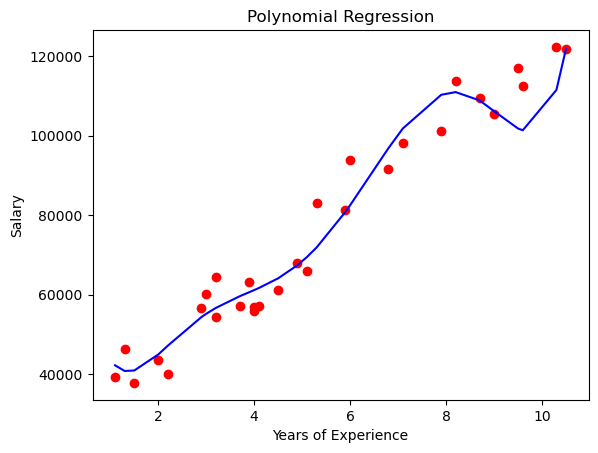

In [18]:
plt.scatter(X, Y, color='red')
plt.plot(X,pol_reg.predict(poly_feature.transform(X)), color='blue')
plt.title('Polynomial Regression')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

### Polynomial regression has indeed overfitted MSE has increased and R2 score decreased

In [19]:
from sklearn.metrics import mean_squared_error, r2_score

# The mean squared error
#Mean squared error regression loss

print("Mean squared error = %.2f" % mean_squared_error(Y_test, Y_predict))

# Explained variance score: 1 is perfect prediction.
# R^2 (coefficient of determination) regression score function.
# Best possible score is 1.0, a
# a constant model that always predicts the expected value of y, disregarding the input features, 
#would get a R^2 score of 0.0.

print('Variance score = %.2f' % r2_score(Y_test, Y_predict))

Mean squared error = 74756936.93
Variance score = 0.91
